In [ ]:
#Word cloud generation derived from notebook of Omdena ACET Challenge(https://omdena.com/blog/infrastructural-needs/)
import re
import pandas as pd

In [ ]:
'''Another issue to consider when working with social media data is how to deal with emojis, 
mentions (@MisterX), hashtags (#Africa), email addresses, and URLs. 
The solution depends on your specific task. 
In our project, we used Python re module to remove emojis, email addresses, URLs, and hash symbol 
so that for instance, “#Africa” becomes “Africa”.'''

'Another issue to consider when working with social media data is how to deal with emojis, \nmentions (@MisterX), hashtags (#Africa), email addresses, and URLs. \nThe solution depends on your specific task. \nIn our project, we used Python re module to remove emojis, email addresses, URLs, and hash symbol \nso that for instance, “#Africa” becomes “Africa”.'

In [ ]:
emoji_pattern = re.compile("["
   u"\U0001F600-\U0001F64F" # emoticons
   u"\U0001F300-\U0001F5FF" # symbols & pictographs
   u"\U0001F680-\U0001F6FF" # transport & map symbols
   u"\U0001F1E0-\U0001F1FF" # flags (iOS)
   u"\U00002702-\U000027B0"
   u"\U000024C2-\U0001F251"
   u"\U00002500-\U00002BEF" # chinese char
   u"\U0001f921-\U0001f937"
   u"\U00010000-\U0010ffff"
   u"\u2640-\u2642"
   u"\u2600-\u2B55"
   u"\u200d"
   u"\u23cf"
   u"\u23e9"
   u"\u231a"
   u"\ufe0f" # dingbats
   u"\u3030"
   "]+", flags=re.UNICODE)
email_pattern = re.compile("\S+@\S+\.\S{2,3}")
link_pattern = re.compile("https?\S+")

mentions_pattern = re.compile("@[a-zA-Z0-9_.]+?(?![a-zA-Z0-9_.])")
#mentions_pattern = re.compile("(?<![^\s])(([@]{1}|[#]{1})[A-Za-z0-9]+)(?![^\s])")


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving filtered_tweets_LCovid_keywords_batch_E2.csv to filtered_tweets_LCovid_keywords_batch_E2.csv


In [ ]:
def clean_data(tweet):
    try:
        tweet_rep = emoji_pattern.sub(r'', tweet)
        tweet_rep = email_pattern.sub(r'', tweet_rep)
        tweet_rep = link_pattern.sub(r'', tweet_rep)

        tweet_rep = mentions_pattern.sub(r'', tweet_rep)

        tweet_rep = tweet_rep.replace("’", "‘")
        tweet_rep = tweet_rep.replace("&amp;", "&")
        tweet_rep = tweet_rep.replace("#", '')
        tweet_rep = tweet_rep.strip()
        return tweet_rep
    except:
        return ""

df= pd.read_csv('/content/filtered_tweets_LCovid_keywords_batch_E2.csv')

In [ ]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Date,User,Tweet_id,Tweet
0,0,0,2021-05-09 04:04:38+00:00,AbhinavKaurav,1391242682257711104,@IndoreCollector @aajtak @ndtvindia @timesofin...
1,1,1,2021-05-09 04:04:51+00:00,StellatoMassimi,1391242739329773568,ORDINANZA BALNEARE:\n✅ le misure di prevenzion...
2,2,2,2021-05-09 04:06:22+00:00,larenait,1391243118943539205,Prima Pagina di domenica 9 maggio 2021\n#Lare...
3,3,3,2021-05-09 04:12:19+00:00,comotvfree,1391244617895514119,#PNRR ...caro Fra' sei sicuro che esiste un pi...
4,4,4,2021-05-09 04:14:00+00:00,tempoweb,1391245039745966080,"✔ Il miracolo di #Zingaretti, ha moltiplicato ..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16520 entries, 0 to 16519
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    16520 non-null  int64 
 1   Unnamed: 0.1  16520 non-null  int64 
 2   Date          16520 non-null  object
 3   User          16520 non-null  object
 4   Tweet_id      16520 non-null  int64 
 5   Tweet         16520 non-null  object
dtypes: int64(3), object(3)
memory usage: 774.5+ KB


In [ ]:
clean_tweet_list=[]
for tweet in df.Tweet:
    #print(i)
    clean_tweet=clean_data(tweet)
    clean_tweet_list.append(clean_tweet)
print(clean_tweet_list)

['Vaccine Scam India Video:\n\nvaccinescam Indore Covid19\ncowin', 'ORDINANZA BALNEARE:\n le misure di prevenzione dal contagio da COVID-19\n la necessità di esporre su cartellonistica informativa le regole di comportamento da seguire\n la possibilità, per i Comuni, di svolgere attività di sorveglianza su siti specifici', 'Prima Pagina di \xa0domenica 9 maggio 2021\nLarenaoggi covid Verona\nCORONAVIRUS \xa0Sì alle visite nelle case di riposo. L‘Italia apre ai turisti\nIncidenti Bilancio totale: 5 schianti, 10 feriti, tre dei quali gravi\nSerieA HellasTorino alle 15', "PNRR ...caro Fra' sei sicuro che esiste un piano per salvare l'umanità dal COVID19!Biden apre i brevetti Draghi dice che non serve a niente e tu Fra' ci credi al piano  salvataggio?", 'Il miracolo di Zingaretti, ha moltiplicato le poltrone  La Meloni svela le telefonate di Conte sul Covid  Assalto ai negozi dl centro e al litorale  Ecco la nostra primapagina  in edicola buongiorno regionelazio  pd covid19 roma 9maggio ilt

In [ ]:
print(len(clean_tweet_list))

16520


In [ ]:
# spacy for lemmatization
import spacy

In [ ]:
!python -m spacy download it_core_news_sm
#!python -m spacy download it_core_news_lg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.0 MB 17.2 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('it_core_news_sm')


In [ ]:
# Initialize spacy 'it_core_news_sm' model, keeping only tagger component (for efficiency)
#!python -m spacy download it_core_news_sm
nlp = spacy.load('it_core_news_sm', disable=['parser', 'ner'])
#nlp = spacy.load('it_core_news_sm')
#nlp = spacy.load('it_core_news_lg')

In [22]:
from spacy.lang.it.stop_words import STOP_WORDS as it_stop
#print(len(list(it_stop)))  # #=624
it_stop |= {"Coronavirus","COVID19","Covid", "coronavirus", "Covid19"}
print(len(nlp.Defaults.stop_words))
print(sorted(list(nlp.Defaults.stop_words)))
#print(sorted(list(it_stop)))
#print(type(it_stop))
#print(sorted(list(it_stop)))

629
['COVID19', 'Coronavirus', 'Covid', 'Covid19', 'a', 'abbastanza', 'abbia', 'abbiamo', 'abbiano', 'abbiate', 'accidenti', 'ad', 'adesso', 'affinche', 'agl', 'agli', 'ahime', 'ahimè', 'ai', 'al', 'alcuna', 'alcuni', 'alcuno', 'all', 'alla', 'alle', 'allo', 'allora', 'altri', 'altrimenti', 'altro', 'altrove', 'altrui', 'anche', 'ancora', 'anni', 'anno', 'ansa', 'anticipo', 'assai', 'attesa', 'attraverso', 'avanti', 'avemmo', 'avendo', 'avente', 'aver', 'avere', 'averlo', 'avesse', 'avessero', 'avessi', 'avessimo', 'aveste', 'avesti', 'avete', 'aveva', 'avevamo', 'avevano', 'avevate', 'avevi', 'avevo', 'avrai', 'avranno', 'avrebbe', 'avrebbero', 'avrei', 'avremmo', 'avremo', 'avreste', 'avresti', 'avrete', 'avrà', 'avrò', 'avuta', 'avute', 'avuti', 'avuto', 'basta', 'bene', 'benissimo', 'brava', 'bravo', "c'", 'casa', 'caso', 'cento', 'certa', 'certe', 'certi', 'certo', 'che', 'chi', 'chicchessia', 'chiunque', 'ci', 'ciascuna', 'ciascuno', 'cima', 'cio', 'cioe', 'circa', 'citta', 'citt

In [23]:
def tweetBatch_to_words(sentences):
    for sentence in sentences:
      doc = nlp(sentence)
      for token in doc:
#        yield token.text, token.is_stop, token.is_punct
        yield token.text, token.text in it_stop, token.is_punct

In [47]:
import math

n = math.ceil(len(clean_tweet_list)/4000)
print(n)

5


In [48]:
#tokens = list(tweetBatch_to_words(clean_tweet_list))  #ERROR IOPub data rate exceeded.

#due to the above error, split of clean_tweet_list to yield tokens
tokens = []

for i in range(n-1):
  tokens.append(list(tweetBatch_to_words(clean_tweet_list[i*4000:(i+1)*4000])))

tokens.append(list(tweetBatch_to_words(clean_tweet_list[(n-1)*4000:])))


In [49]:
print(len(tokens)) # #=5

5


In [50]:
cleaned = []
for i in range(n):
  cleaned += [el[0] for el in tokens[i] if not el[1] and not el[2] and not el[0].isspace()]

In [51]:
print(len(cleaned)) # #=184484

184484


In [52]:
# join in unique text required for wordcloud
text = ' '.join([str(el) for el in cleaned])
print(text)

Vaccine Scam India Video vaccinescam Indore cowin ORDINANZA BALNEARE misure prevenzione contagio COVID-19 necessità esporre cartellonistica informativa regole comportamento seguire possibilità i Comuni svolgere attività sorveglianza siti specifici Prima Pagina domenica 9 maggio 2021 Larenaoggi covid Verona CORONAVIRUS Sì visite case riposo L‘Italia apre turisti Incidenti Bilancio totale 5 schianti 10 feriti gravi SerieA HellasTorino 15 PNRR caro Fra sicuro esiste piano salvare umanità COVID19!Biden apre i brevetti Draghi serve Fra credi piano salvataggio Il miracolo Zingaretti moltiplicato poltrone La Meloni svela telefonate Conte Assalto negozi dl centro litorale Ecco primapagina edicola buongiorno regionelazio pd covid19 roma 9maggio iltempoquotidiano Siete ritardo successo covid19 Buongiorno tl We run celafaremo Himalaya Italy Leonardo Da Vinci Club Il presidente brasiliano Jair Bolsonaro suggerisce laboratorio guerra biologica rapporti GNEWS hahahha veridico How Narendra Modi Conqu

(-0.5, 1599.5, 799.5, -0.5)

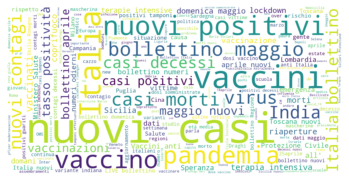

In [53]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt
% matplotlib inline

#wordcloud = WordCloud().generate(text)

wordcloud = WordCloud(
    background_color = 'white', 
    width = 1600, height = 800,
    max_font_size = 200, 
    random_state = 0,
    stopwords = it_stop
).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")